In [1]:
# 不完全データとは？
# 全部でp種類の変量に対して、nサンプル分のデータを観測するとした場合、
# n*p行列のデータが全て得られている時を「完全データ」という
# 一方で、いくつかの要素が欠測している場合を「不完全データ」という
# また、擬似的に「不完全データ」を何らかの方策で完全にしたものを「擬似完全データ」という

In [15]:
# 欠測メカニズムとは
# 「不完全データ」への対処方法を決める際に重要となる
# 欠測メカニズムは、以下のように分類される

# MCAR(Missing Completely At Random)
# 欠測は、欠測データ及び観測データの両方に依存せず、ランダムに生じる

import pandas as pd

mcar_df = pd.DataFrame(
    {
        'class':['A','B','A','A','B','B','A','B'],
        'score':[None, 90, 85, None, 75, None, 60, None],
        'score_perfect':[98, 90, 85, 80, 75, 73, 60, 54]
    }
)
mcar_df # "ランダムに欠損が存在"

,class,score,score_perfect
0,A,NaN,98
1,B,90.0,90
2,A,85.0,85
3,A,NaN,80
4,B,75.0,75
5,B,NaN,73
6,A,60.0,60
7,B,NaN,54


In [16]:
# MAR(Missing At Random)
# 欠測は、観測データに依存して生じるが、欠測データの値によらない

mar_df = pd.DataFrame(
    {
        'class':['A','B','A','A','B','B','A','B'],
        'score':[98, None, 85, 80, None, None, 60, None],
        'score_perfect':[98, 90, 85, 80, 75, 73, 60, 54]
    }
)
mar_df # class Bに欠測が集中

,class,score,score_perfect
0,A,98.0,98
1,B,NaN,90
2,A,85.0,85
3,A,80.0,80
4,B,NaN,75
5,B,NaN,73
6,A,60.0,60
7,B,NaN,54


In [17]:
# MNAR(Missing Not At Random):欠測は、欠測データの値そのものの値に依存して生ずる

mnar_df = pd.DataFrame(
    {
        'class':['A','B','A','A','B','B','A','B'],
        'score':[98, 90, 85, 80, None, None, None, None],
        'score_perfect':[98, 90, 85, 80, 75, 73, 60, 54]
    }
)
mnar_df # scoreが低いほうに欠測が集中

,class,score,score_perfect
0,A,98.0,98
1,B,90.0,90
2,A,85.0,85
3,A,80.0,80
4,B,NaN,75
5,B,NaN,73
6,A,NaN,60
7,B,NaN,54


In [19]:
# 削除法と補完法について
# 欠測のあるサンプルのデータを削除するのが「削除法」
# 欠測データに何らかの値を代入するのが「補完法」

# 削除法の分類
# CC(Complete Case)解析：全ての変量が観測されている個体のみを用いる解析
# AC(Available Case)解析：使える変量データは全部使う解析

# 補完法の分類
# 平均値代入：観測データの平均値を代入
# 回帰代入：回帰式によって欠測部分を予測して代入
# Hot Deck法：欠測のあるサンプルと類似のサンプルを同じデータセットから探し出して、その値を代入

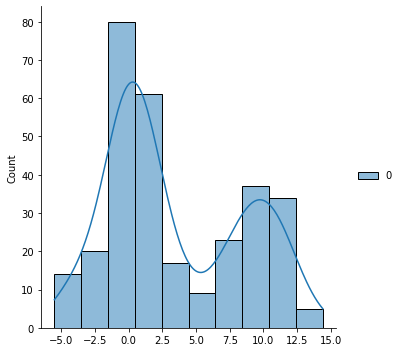

In [35]:
# EMアルゴリズムとは
# MARの状況で、欠測値のあるデータからパラメータの最尤推定値を求める一般的なアルゴリズムのこと
# E-ステップとM-ステップを交互に繰り返す

# 学習させたいデータを描画
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x1 = np.random.normal(loc=0.5, scale=1 , size =100).reshape(-1,1)
x2 = np.random.normal(loc=10, scale=2 , size =100).reshape(-1,1)
x3 = np.random.normal(loc=0, scale=3 , size =100).reshape(-1,1)
x = np.concatenate([x1 , x2 , x3])
sns.displot(data=x, kde=True)
plt.show()

In [40]:
# EMアルゴリズムを実行

# 初期パラメータ
mu = np.array([0, 10, 3])
sig = np.array([1, 5, 10])
pi = np.array([0.1, 0.4, 0.5])
print("初期パラメータ mu:{}, sig:{}, pi:{}".format(mu, sig, pi))

# 学習パラメータ
iter_num = 100
e_val = 0.01
LF = 0

for i in range(iter_num):
    # 正規分布の値を取得
    gaus_val = np.exp( - pow((x-mu), 2) /(2*sig) )/np.sqrt(2*np.pi*sig)
    
    # ----- E-ステップ ----- #
    # 事後分布の計算
    gamma_val = pi * gaus_val
    gamma_val = gamma_val/np.sum(gamma_val, axis=1).reshape(len(x),1)
    N_k = np.sum(gamma_val, axis=0)
    N = np.sum(N_k)

    # ----- M-ステップ ----- #
    LF_new = np.sum(np.log(np.sum(pi*gaus_val, axis=1)))
    ch = LF_new - LF
    print("LF ={} . change = {}".format(LF_new, ch))

    # e_val以下になるまで尤度を更新
    if np.abs(ch) < e_val:
        print("Iteration is finished {} iter. ".format(i+1))
        break
    LF = LF_new

    # パラメータの更新
    mu_k = np.sum(x*gamma_val, axis=0) / N_k
    sig_k = np.sum(gamma_val*pow(x-mu, 2), axis=0) / N_k
    pi_k = N_k / N
    
    pi = pi_k
    mu = mu_k
    sig = sig_k

print("更新後パラメータ mu:{}, sig:{}, pi:{}".format(mu, sig, pi))


初期パラメータ mu:[ 0 10  3], sig:[ 1  5 10], pi:[0.1 0.4 0.5]
LF =-877.4654612381937 . change = -877.4654612381937
LF =-825.3960464792756 . change = 52.06941475891813
LF =-817.9308562443857 . change = 7.46519023488986
LF =-815.4515344786378 . change = 2.4793217657479545
LF =-814.1151915960506 . change = 1.3363428825871324
LF =-813.3045625191385 . change = 0.8106290769121642
LF =-812.804622124292 . change = 0.499940394846476
LF =-812.4989032313249 . change = 0.30571889296709287
LF =-812.3136038102255 . change = 0.18529942109944386
LF =-812.2016053256484 . change = 0.1119984845770432
LF =-812.1336962323954 . change = 0.06790909325297889
LF =-812.092231443711 . change = 0.041464788684493215
LF =-812.0666954483413 . change = 0.02553599536963702
LF =-812.0508340268527 . change = 0.015861421488580163
LF =-812.0409059161791 . change = 0.009928110673627089
Iteration is finished 15 iter. 
更新後パラメータ mu:[0.26257984 9.69539209 0.10089626], sig:[0.70810192 3.34431774 6.73171966], pi:[0.23854304 0.34269514

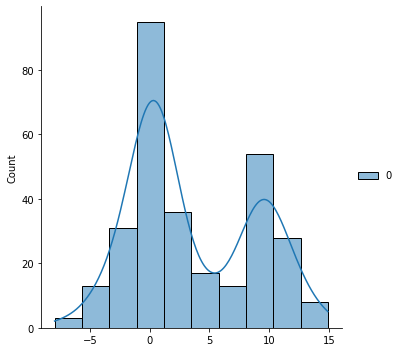

In [41]:
# 推定データを描画
x_pred1 = np.random.normal(loc=mu[0], scale=np.sqrt(sig)[0] , size =int(300*pi[0]) ).reshape(-1,1)
x_pred2 = np.random.normal(loc=mu[1], scale=np.sqrt(sig)[1] , size =int(300*pi[1]) ).reshape(-1,1)
x_pred3 = np.random.normal(loc=mu[2], scale=np.sqrt(sig)[2] , size =int(300*pi[2]) ).reshape(-1,1)
x_pred = np.concatenate([x_pred1, x_pred2, x_pred3])
sns.displot(data=x_pred, kde=True)
plt.show() # 学習元データと同じような確率密度分布を描画することができた